In [23]:
import re
from text_to_num import text2num


def parseResults(file):
    # Example:
    # sol/enum/log_centSommets.txt.txt:Result: best solution found in 60.00 seconds with cost: inf.
    # sol/enum/log_cinqCentSommets.txt.txt:Result: best solution found in 60.03 seconds with cost: inf.
    # sol/enum/log_cinqSommets.txt.txt:Result: best solution found in 0.00 seconds with cost: 4.
    # ...

    # save the name of the instance, the time and the cost in a list
    results = list()
    for line in open(file, "r").readlines():
        if "Result" in line:
            instance = line.split(":")[0].removeprefix("sol/enum/log_").removesuffix("Sommets.txt")
            # split by upper case letter
            instance = re.split("(?<!^)(?=[A-Z])", instance)
            # lowercase the letter of each word
            instance = [word.lower() for word in instance]
            # join the words
            instance = "-".join(instance)

            # special cases...
            if instance == "cinq-cent":
                instance = "cinq cent"
            if instance == "dix-mille":
                instance = "dix mille"
            if instance == "vingt-etun":
                instance = "vingt et un"

            # text to number
            instance = text2num(instance, "fr")

            time = float(line.split(":")[2].split(" ")[5])
            cost = line.split(":")[3].removeprefix(" ").removesuffix(".\n")

            results.append([instance, time, cost])

            #sort the results by instance
            results.sort(key=lambda x: x[0])

    return results

results = parseResults("sol/enum/results.csv")
print(results)

[[4, 0.0, '2'], [5, 0.0, '4'], [10, 0.01, '13'], [15, 0.74, '43'], [17, 3.47, '60'], [20, 17.13, '40'], [21, 60.0, '107'], [22, 60.0, '103'], [23, 60.0, '116'], [24, 60.01, '131'], [25, 60.0, '152'], [30, 60.0, '190'], [50, 60.0, 'inf'], [100, 60.0, 'inf'], [500, 60.02, 'inf'], [1000, 60.06, 'inf'], [10000, 80.19, 'inf']]


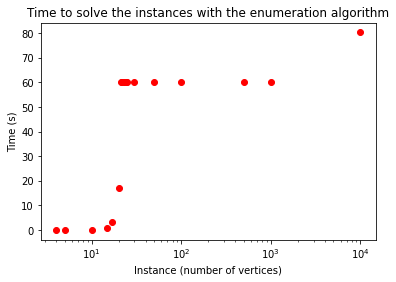

In [29]:
from matplotlib import pyplot as plt

# plot the results (X = instance, Y = time) with a log scale for the X axis
plt.plot([result[0] for result in results], [result[1] for result in results], "ro")
plt.xlabel("Instance (number of vertices)")
plt.ylabel("Time (s)")
plt.xscale("log")
# title
plt.title("Time to solve the instances with the enumeration algorithm")
plt.show()